# I: Basics of quantum information

Testing out and playing with basic operations in Qiskit, following IBM course in title.

### Basic setup and playing with single systems

In [1]:
from qiskit import __version__

In [2]:
print(__version__)

2.2.1


In [3]:
import numpy as np

In [4]:
from qiskit.quantum_info import Statevector

In [5]:
u = Statevector( [1,1]/np.sqrt(2) )

In [6]:
display(u.draw("latex"))

<IPython.core.display.Latex object>

Try a measurement, then try lots of measurements

In [7]:
outcome, state = u.measure()
print("Measured result: ",outcome)
print("State collapses to:")
display(state.draw("latex"))

Measured result:  0
State collapses to:


<IPython.core.display.Latex object>

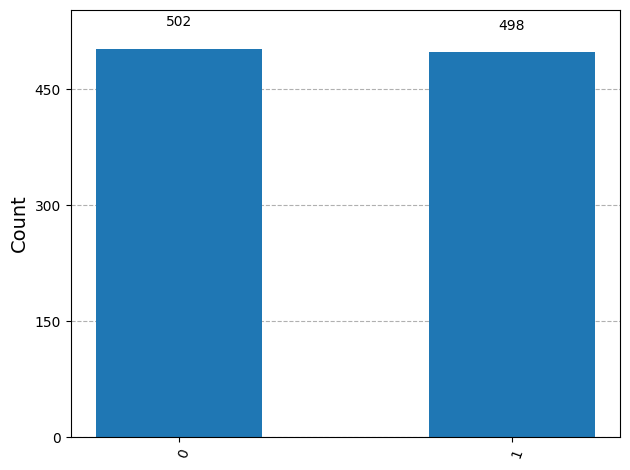

In [8]:
from qiskit.visualization import plot_histogram

stats = u.sample_counts(1000)
plot_histogram(stats)


### Multi-qubit exploration

In [9]:
from qiskit.quantum_info import Operator

In [10]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero ^ one
display(psi.draw("latex"))

<IPython.core.display.Latex object>

In [11]:
plus = Statevector.from_label("+")
display(plus.draw("latex"))
minus = Statevector.from_label("-")
display(minus.draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
display((plus^one).draw("latex"))

<IPython.core.display.Latex object>

In [13]:
H = Operator.from_label("H")
display(H.draw("latex"))

<IPython.core.display.Latex object>

In [14]:
I = Operator.from_label("I")
X = Operator.from_label("X")
display((I^X).draw("latex"))
display((X^I).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Recall our standard ordered basis for 2 qubits is:
$$ |00\rangle, \;\; |01\rangle, \;\; |10\rangle, \;\; |11\rangle $$
So the first matrix above swaps
$$ |00\rangle \leftrightarrow |01\rangle, \;\;\;\; |10\rangle \leftrightarrow |11\rangle $$
which is NOT on leftmost qubit, as expected.

Similarly, the second matrix swaps
$$ |00\rangle \leftrightarrow |10\rangle, \;\;\;\; |01\rangle \leftrightarrow |11\rangle $$
which is NOT on rightmost qubit.

We see below how Hadamard operator is spread across the qubits if we tensor with identity on left/right.


In [15]:
display((I^H).draw("latex"))
display((H^I).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

So $H\otimes Id$ should send (plus^one) to (zero^one).  Check:

In [16]:
display((plus^one).evolve(H^I).draw("latex"))

<IPython.core.display.Latex object>

### Let's play with circuits.  
We know the Hadamard operator is self inverse:
$$ |0\rangle \mapsto |+\rangle \mapsto |0\rangle, \;\;\;\; |1\rangle \mapsto |-\rangle \mapsto |1\rangle. $$
We can check this explicitly.

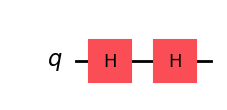

<IPython.core.display.Latex object>

In [17]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.h(0)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

### Partial measurements of state

In [18]:
#Modified from example to work with different amplitudes

#Prepare 3 qubit state
v = (Statevector([0, 1, 0, 0, 0, 0, 0, 0]) / np.sqrt(6) 
     + Statevector([0, 0, 1, 0, 0, 0, 0, 0])/ np.sqrt(3)
     + Statevector([0, 0, 0, 0, 1, 0, 0, 0])/ np.sqrt(2)
    )
display(v.draw("latex"))


#Measure first (rightmost!) qubit
vresult1, vnew1 = v.measure([0])
print("Result of first (rightmost) measurement:",vresult1)
print("New state:")
display(vnew1.draw("latex"))

#Measure second (middle!) qubit
vresult2, vnew2 = vnew1.measure([1])
print("Result of second (middle) measurement:",vresult2)
print("New state:")
display(vnew2.draw("latex"))



<IPython.core.display.Latex object>

Result of first (rightmost) measurement: 0
New state:


<IPython.core.display.Latex object>

Result of second (middle) measurement: 1
New state:


<IPython.core.display.Latex object>

### Check HSH is square root of X (not gate) using circuits


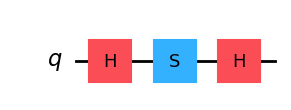

<IPython.core.display.Latex object>

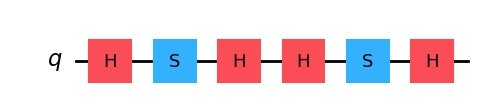

<IPython.core.display.Latex object>

In [19]:

HSH = QuantumCircuit(1)

HSH.h(0)
HSH.s(0)
HSH.h(0)

display(HSH.draw(output="mpl"))
display(Operator.from_circuit(HSH).draw("latex"))

HSH2 = HSH.compose(HSH)

display(HSH2.draw(output="mpl"))
display(Operator.from_circuit(HSH2).draw("latex"))




Note $H$ is self-inverse, so we can simplify the second circuit by removing both middle $H$'s

Then we have two $S$ gates in succession, so $|1\rangle$ is multiplied by $i^2=-1$.
So replace both $S$ gates by a single $Z$ gate



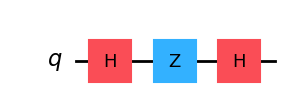

<IPython.core.display.Latex object>

In [20]:
c2 = QuantumCircuit(1)

c2.h(0)
c2.z(0)
c2.h(0)

display(c2.draw(output="mpl"))
display(Operator.from_circuit(c2).draw("latex"))


### Teleportation

Code up the circuit for practice.


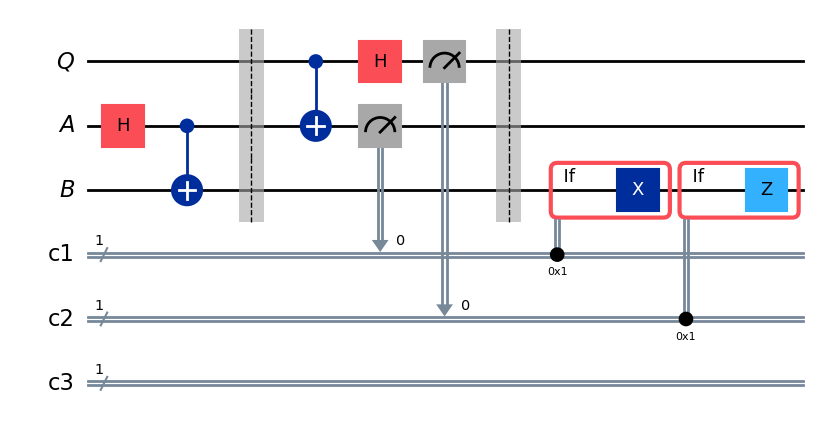

In [21]:
from qiskit import QuantumRegister, ClassicalRegister

message = QuantumRegister(1, 'Q')
alice = QuantumRegister(1, 'A')
bob = QuantumRegister(1, 'B')
c1 = ClassicalRegister(1, 'c1')
c2 = ClassicalRegister(1, 'c2')

# Add c3 for measurement later
c3 = ClassicalRegister(1, 'c3')

qTelep = QuantumCircuit(message, alice, bob, c1, c2, c3)

# Set up entangled Bell state shared between Alice and Bob
# Idea: |00>, apply 1^H to get |0+> = (|00>+|01>)/sqrt(2)
#             apply CNOT(A,B) to get  (|00>+|11>)/sqrt(2) = |phi^+>
qTelep.h(alice)
qTelep.cx(alice, bob)
qTelep.barrier()

# Alice applies CNOT(Q,A), then H(Q)
qTelep.cx(message,alice)
qTelep.h(message)

# Alice measures both qubits and sends results to Bob as classical bits
qTelep.measure(alice,c1)
qTelep.measure(message,c2)
qTelep.barrier()

# Bob applies controlled not and controlled Z, using c1 and c2 as controls
with qTelep.if_test((c1,1)):
    qTelep.x(bob)
with qTelep.if_test((c2,1)):
    qTelep.z(bob)

display(qTelep.draw(output="mpl"))


In the lesson, they test this by using a random unitary operator to prepare an intial state, then applying the inverse later and checking you get the zero state.

I want to do something more basic: choose a qubit with interesting coefficients, then measure multiple times and see if we get the expected distribution.

Playing around on paper, I try applying $H$ then $T$ then $H$.  This gives:
$$ |0\rangle \mapsto
\frac1{\sqrt2}|0\rangle +\frac1{\sqrt2}|1\rangle  \mapsto
\frac1{\sqrt2}|0\rangle +\frac{\omega_8}{\sqrt2}|1\rangle  \mapsto
\frac{1+\omega_8}2|0\rangle +\frac{1-\omega_8}2|1\rangle$$
where $\omega_8=(1+i)/\sqrt{2}$.

Now
$$ \left| \frac{1+\omega_8}2\right|^2=\frac{2+\sqrt2}4=\cos^2\frac\pi8\approx 0.85$$
and
$$ \left| \frac{1-\omega_8}2\right|^2=\frac{2-\sqrt2}4=\sin^2\frac\pi8\approx 0.15$$

So if we prepare the message by applying $H,T,H$ and measure the outcome, we expect to get:
 - 0 about 85% of the time;
 - 1 about 15% of the time.


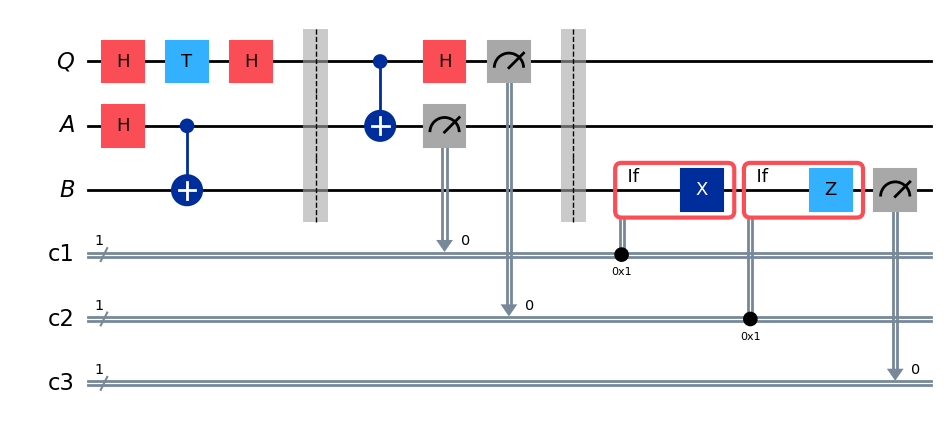

In [22]:
#Prepare the message
prep = QuantumCircuit(message, alice, bob, c1, c2, c3)

prep.h(message)
prep.t(message)
prep.h(message)

#Measure Bob's result
measBob = QuantumCircuit(message, alice, bob, c1, c2, c3)
measBob.measure(bob,c3)

#Compose prep with teleport
qTelepPi8 = prep.compose(qTelep)
qTelepPi8 = qTelepPi8.compose(measBob)

display(qTelepPi8.draw(output="mpl"))


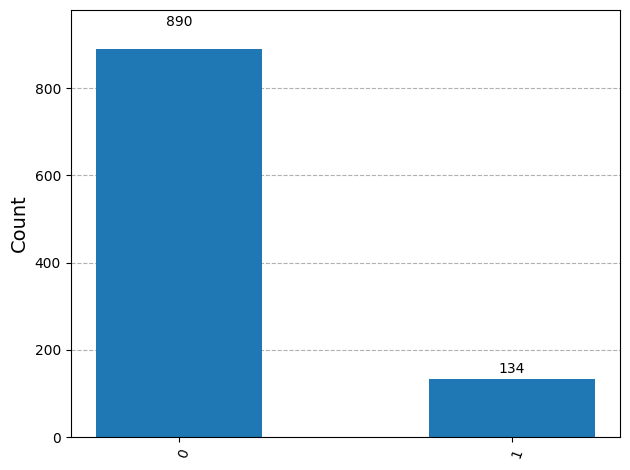

In [23]:
from qiskit_aer import AerSimulator
from qiskit.result import marginal_distribution

simulation = AerSimulator().run(qTelepPi8).result()
preresults = simulation.get_counts()
results = marginal_distribution(preresults,[2])
display(plot_histogram(results))

In [24]:
res0 = results['0']
res1 = results['1']
total = res0+res1 # == 2**10
print('Percentage of zeros: ',res0*100/total)
print('Percentage of ones: ',res1*100/total)


Percentage of zeros:  86.9140625
Percentage of ones:  13.0859375


This is pretty close to the 85% to 15% split we expected, so it seems the teleportation has worked.
